In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Initial Analysis

### Goalkeepers

In [3]:
gk_df = pd.read_csv('goalkeepers_df.csv')
gk_df

,Player,Foot,Height,Weight,Nationality,Club,Wage,Expiration,PSxG-GA,GoalsAgainst,...,GoalKicks,Avg.LengthofGoalKicks,CrossesStopped%,Def.ActionsOutsidePen.Area,Avg.DistanceofDef.Actions,Role,Birth,Value,League,Age
0,David Raya,Right,186.0,81.0,Spain,Arsenal,5.17,2024,-0.02,0.72,...,3.63,45.8,12.3,1.53,17.6,Goalkeeper,1995-09-15,35.0,English Premier League,28
1,Aaron Ramsdale,Right,195.0,79.0,England,Arsenal,7.30,2026,-0.23,1.15,...,3.85,48.3,14.2,0.92,12.7,Goalkeeper,1998-05-14,25.0,English Premier League,25
2,Alisson,Right,193.0,91.0,Brazil,Liverpool,9.13,2027,0.05,0.84,...,4.42,35.9,4.8,1.94,18.7,Goalkeeper,1992-10-02,32.0,English Premier League,31
3,Caoimhín Kelleher,Right,188.0,81.0,Ireland,Liverpool,0.61,2026,-0.01,1.42,...,3.16,31.6,8.0,1.26,15.3,Goalkeeper,1998-11-23,18.0,English Premier League,25
4,Ederson,Left,188.0,88.0,Brazil,Manchester City,6.08,2026,0.00,0.89,...,3.60,36.8,8.1,1.13,16.5,Goalkeeper,1993-08-17,40.0,English Premier League,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Stefano Turati,Right,188.0,81.0,Italy,Frosinone,0.85,2024,-0.32,1.93,...,4.70,38.6,4.4,0.63,13.8,Goalkeeper,2001-09-05,7.0,Italian Serie A,22
114,Michele Cerofolini,Right,188.0,79.0,Italy,Frosinone,0.59,2026,-0.15,1.00,...,6.13,40.1,4.6,0.38,12.8,Goalkeeper,1999-01-04,0.5,Italian Serie A,25
115,Andrea Consigli,Right,189.0,78.0,Italy,Sassuolo,1.85,2024,-0.38,1.92,...,6.92,37.6,4.7,0.62,12.5,Goalkeeper,1987-01-27,1.0,Italian Serie A,37
116,Guillermo Ochoa,Right,183.0,78.0,Mexico,Salernitana,1.48,2025,-0.27,2.00,...,8.78,43.7,3.2,0.52,12.8,Goalkeeper,1985-07-13,1.5,Italian Serie A,38


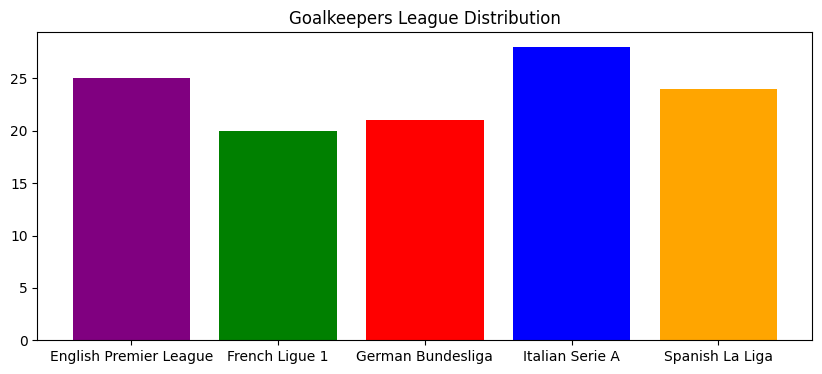

In [4]:
gk_grouped_league = gk_df.groupby('League').size()
plt.figure(figsize=(10,4))
plt.bar(gk_grouped_league.index, gk_grouped_league, color=['purple', 'green', 'red', 'blue', 'orange'])
plt.title('Goalkeepers League Distribution')
plt.show()

In [5]:
gk_grouped_league/len(gk_df)

League
English Premier League    0.211864
French Ligue 1            0.169492
German Bundesliga         0.177966
Italian Serie A           0.237288
Spanish La Liga           0.203390
dtype: float64

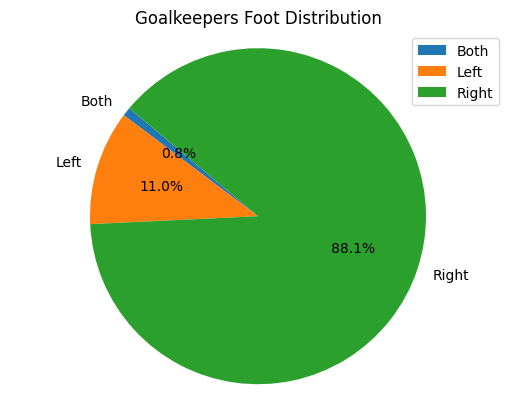

In [6]:
gk_grouped_foot = gk_df.groupby('Foot').size()
plt.pie(gk_grouped_foot, labels=gk_grouped_foot.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Goalkeepers Foot Distribution')
plt.legend(loc='upper right')
plt.show()

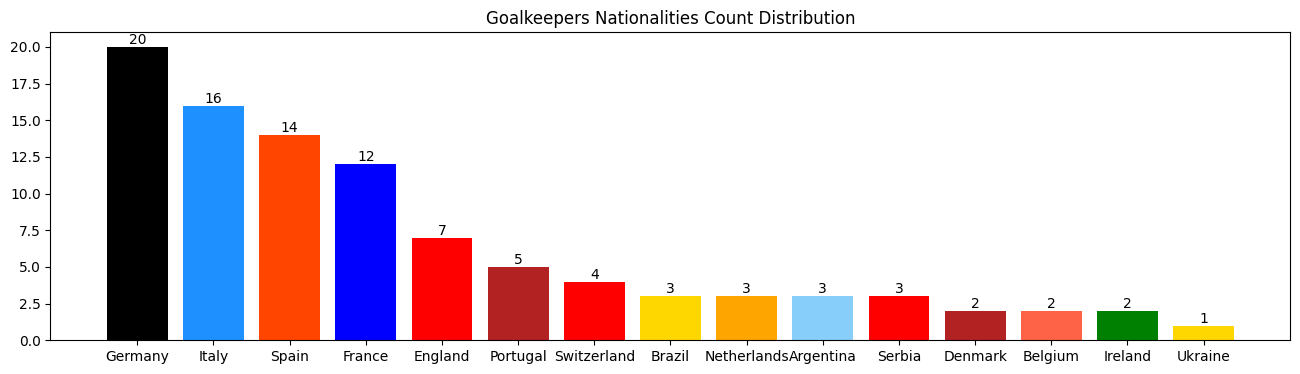

In [7]:
gk_grouped_nationalities = gk_df.groupby('Nationality').size().reset_index(name='Count').sort_values(by='Count', ascending=False)[:15]
plt.figure(figsize=(16,4))
bars = plt.bar(gk_grouped_nationalities['Nationality'], gk_grouped_nationalities['Count'], color=['black', 'dodgerblue', 'orangered', 'blue', 'red', 
                                                        'firebrick', 'red', 'gold', 'orange', 'lightskyblue', 'red', 'firebrick', 
                                                        'tomato', 'green', 'gold'])
plt.title('Goalkeepers Nationalities Count Distribution')
plt.bar_label(bars)
plt.show()

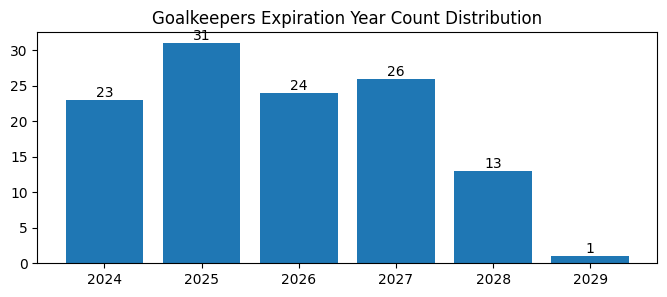

In [8]:
gk_grouped_expiration = gk_df.groupby('Expiration').size()
plt.figure(figsize=(8,3))
bars = plt.bar(gk_grouped_expiration.index, gk_grouped_expiration, )
plt.title('Goalkeepers Expiration Year Count Distribution')
plt.bar_label(bars)
plt.show()

In [9]:
gk_df[['Height', 'Weight']].mean()

Height    189.745763
Weight     81.872881
dtype: float64

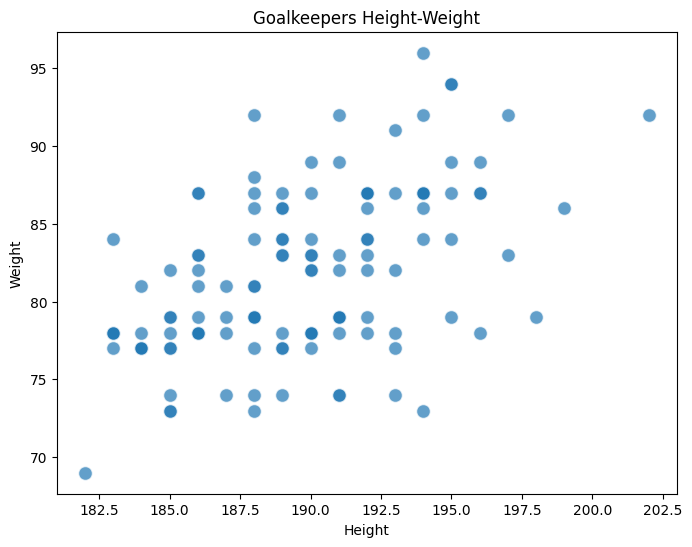

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(gk_df['Height'], gk_df['Weight'], alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Goalkeepers Height-Weight')
plt.show()


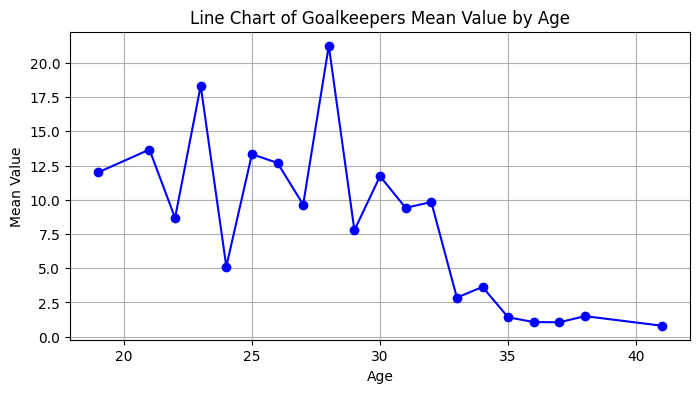

In [11]:
grouped_age = gk_df.groupby('Age')
mean_values = grouped_age['Value'].mean()
plot = mean_values.plot(figsize=(8, 4), marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Line Chart of Goalkeepers Mean Value by Age')
plt.grid(True)
plt.show()

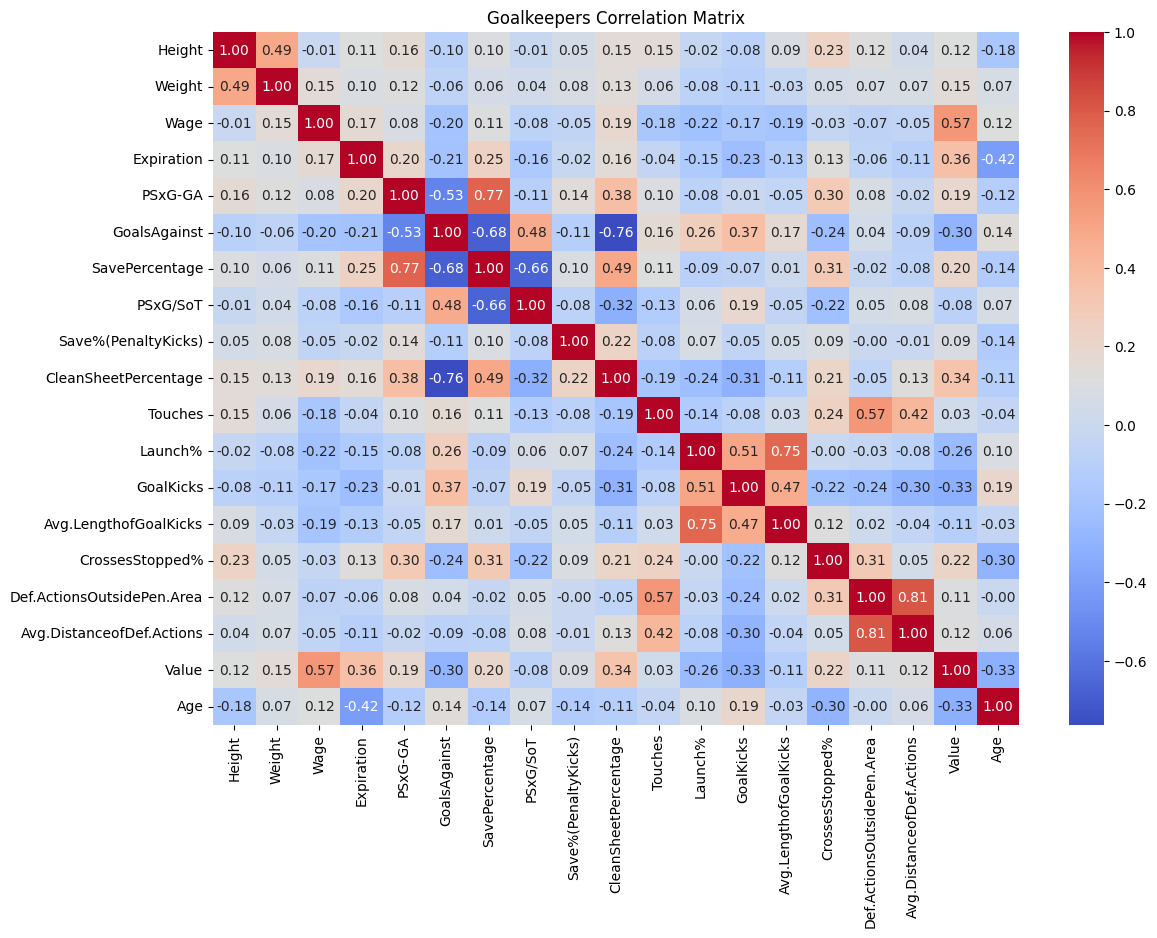

In [12]:
numeric_columns = gk_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns
correlation_matrix = gk_df[numeric_columns].corr()
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Goalkeepers Correlation Matrix')
plt.show()

### Movement Players

In [13]:
pl_df = pd.read_csv('players_df.csv')
pl_df

,Player,Foot,Height,Weight,Nationality,Club,Wage,Expiration,Non-PenaltyGoals,npxG:Non-PenaltyxG,...,Interceptions,Blocks,Clearances,AerialsWon,Position,Birth,Value,League,Age,Role
0,William Saliba,Right,193.0,76.0,France,Arsenal,11.56,2027,0.05,0.04,...,0.66,0.80,2.14,1.93,Centre-Back,2001-03-24,80.0,English Premier League,23,Defender
1,Declan Rice,Right,185.0,77.0,England,Arsenal,14.60,2028,0.15,0.06,...,1.31,1.12,1.44,1.10,Defensive Midfield,1999-01-14,110.0,English Premier League,25,Midfielder
2,Bukayo Saka,Left,178.0,64.0,England,Arsenal,11.86,2027,0.33,0.28,...,0.30,1.19,0.58,0.68,Right Winger,2001-09-05,130.0,English Premier League,22,Forward
3,Ben White,Right,182.0,73.0,England,Arsenal,9.13,2028,0.05,0.03,...,0.89,1.28,1.99,1.05,Right-Back,1997-10-08,55.0,English Premier League,26,Defender
4,Gabriel Magalhães,Left,190.0,78.0,Brazil,Arsenal,6.08,2027,0.09,0.11,...,0.71,1.16,2.78,2.41,Centre-Back,1997-12-19,65.0,English Premier League,26,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Grigoris Kastanos,Left,176.0,71.0,Cyprus,Salernitana,0.19,2026,0.21,0.18,...,0.46,0.93,0.41,1.44,Attacking Midfield,1998-01-30,1.8,Italian Serie A,26,Midfielder
1226,Boulaye Dia,Right,180.0,74.0,Senegal,Salernitana,2.56,2026,0.40,0.25,...,0.28,0.62,0.57,0.51,Centre-Forward,1996-11-16,13.0,Italian Serie A,27,Forward
1227,Junior Sambia,Right,181.0,68.0,France,Salernitana,1.92,2026,0.00,0.05,...,1.21,0.73,2.19,2.67,Right-Back,1996-09-07,2.5,Italian Serie A,27,Defender
1228,Shon Weissman,Right,174.0,73.0,Israel,Salernitana,0.28,2024,0.19,0.17,...,0.57,0.77,0.96,0.77,Centre-Forward,1996-02-14,2.0,Italian Serie A,28,Forward


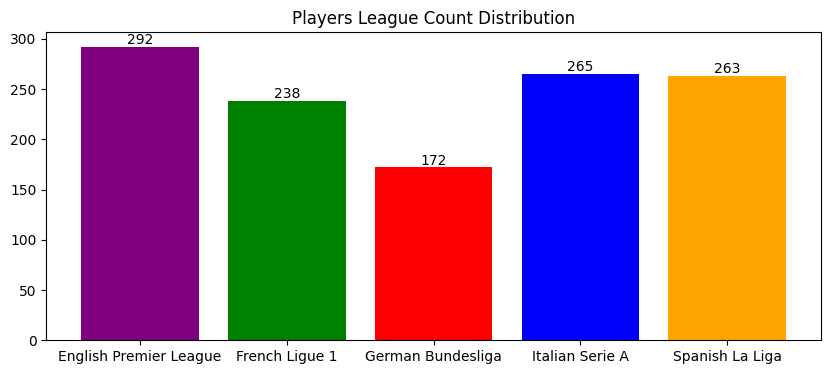

In [14]:
pl_grouped_league = pl_df.groupby('League').size()
plt.figure(figsize=(10,4))
bars = plt.bar(pl_grouped_league.index, pl_grouped_league, color=['purple', 'green', 'red', 'blue', 'orange'])
plt.title('Players League Count Distribution')
plt.bar_label(bars)
plt.show()

In [15]:
pl_grouped_league/len(pl_df)

League
English Premier League    0.237398
French Ligue 1            0.193496
German Bundesliga         0.139837
Italian Serie A           0.215447
Spanish La Liga           0.213821
dtype: float64

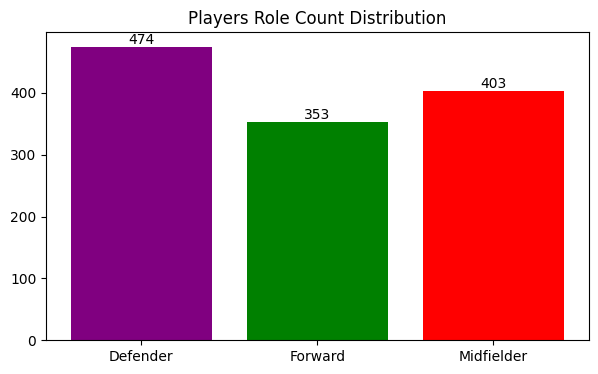

In [16]:
pl_grouped_role = pl_df.groupby('Role').size()
plt.figure(figsize=(7,4))
bars = plt.bar(pl_grouped_role.index, pl_grouped_role, color=['purple', 'green', 'red', 'blue', 'orange'])
plt.title('Players Role Count Distribution')
plt.bar_label(bars)
plt.show()

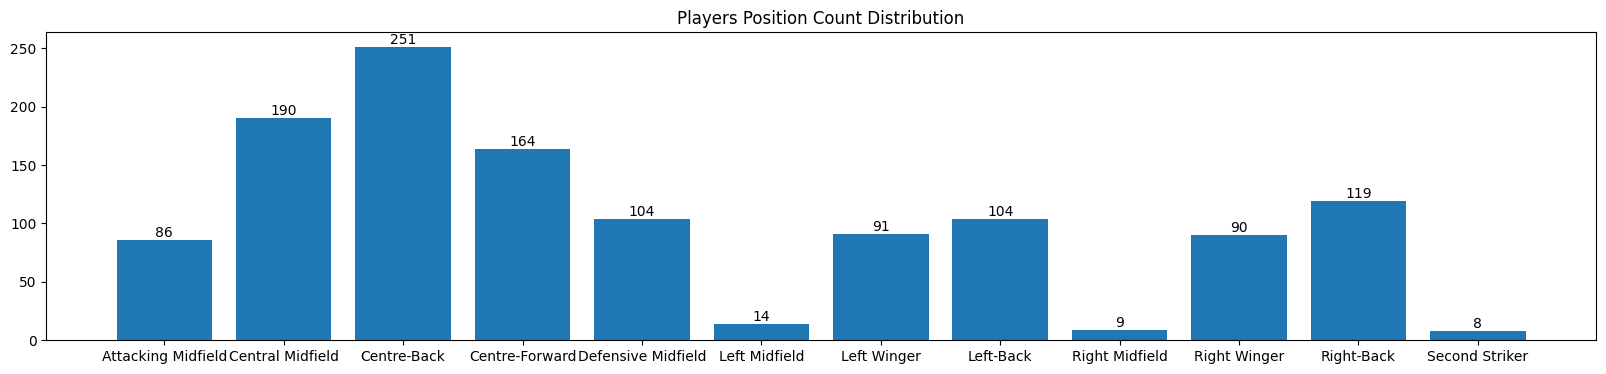

In [17]:
pl_grouped_pos = pl_df.groupby('Position').size()
plt.figure(figsize=(20,4))
bars = plt.bar(pl_grouped_pos.index, pl_grouped_pos)
plt.title('Players Position Count Distribution')
plt.bar_label(bars)
plt.show()

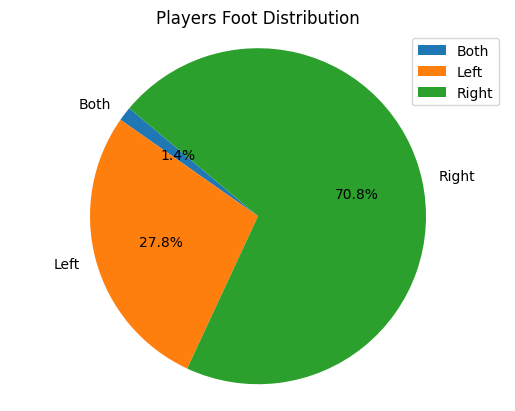

In [18]:
pl_grouped_foot = pl_df.groupby('Foot').size()
plt.pie(pl_grouped_foot, labels=pl_grouped_foot.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Players Foot Distribution')
plt.legend(loc='upper right')
plt.show()

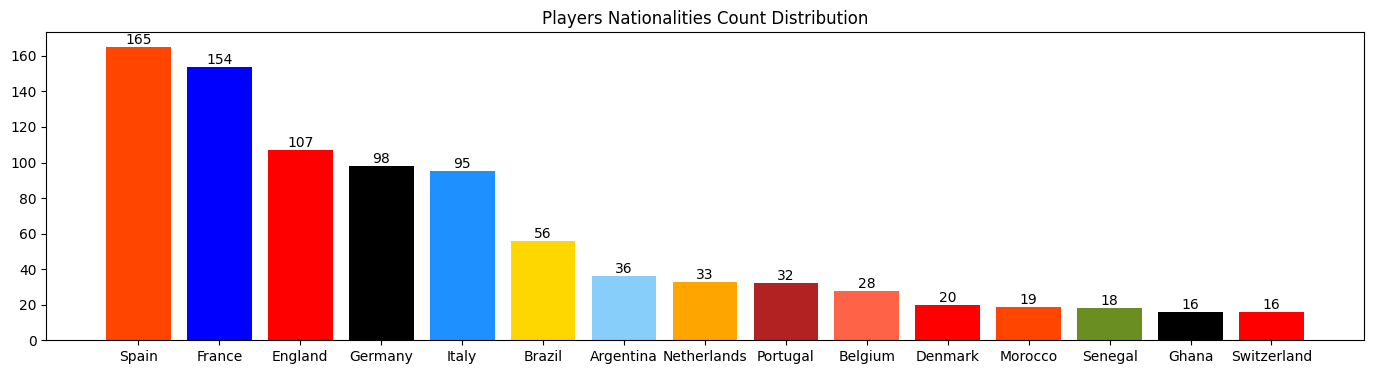

In [19]:
pl_grouped_nationalities = pl_df.groupby('Nationality').size().reset_index(name='Count').sort_values(by='Count', ascending=False)[:15]
plt.figure(figsize=(17,4))
bars = plt.bar(pl_grouped_nationalities['Nationality'], pl_grouped_nationalities['Count'], color=['orangered', 'blue', 'red', 'black', 'dodgerblue', 
                                                        'gold', 'lightskyblue', 'orange', 'firebrick', 
                                                        'tomato', 'red', 'orangered', 'olivedrab', 'black', 'red'])
plt.title('Players Nationalities Count Distribution')
plt.bar_label(bars)
plt.show()

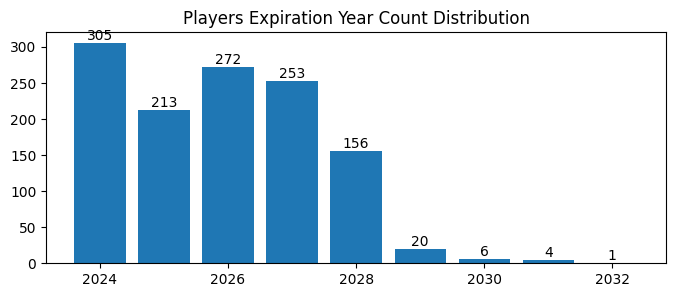

In [20]:
pl_grouped_expiration = pl_df.groupby('Expiration').size()
plt.figure(figsize=(8,3))
bars = plt.bar(pl_grouped_expiration.index, pl_grouped_expiration, )
plt.title('Players Expiration Year Count Distribution')
plt.bar_label(bars)
plt.show()

In [21]:
pl_grouped_role = pl_df.groupby('Role')[['Height', 'Weight']].mean()
pl_grouped_role

,Height,Weight
Role,,
Defender,183.303797,75.295359
Forward,180.841360,72.920680
Midfielder,180.434243,72.248139


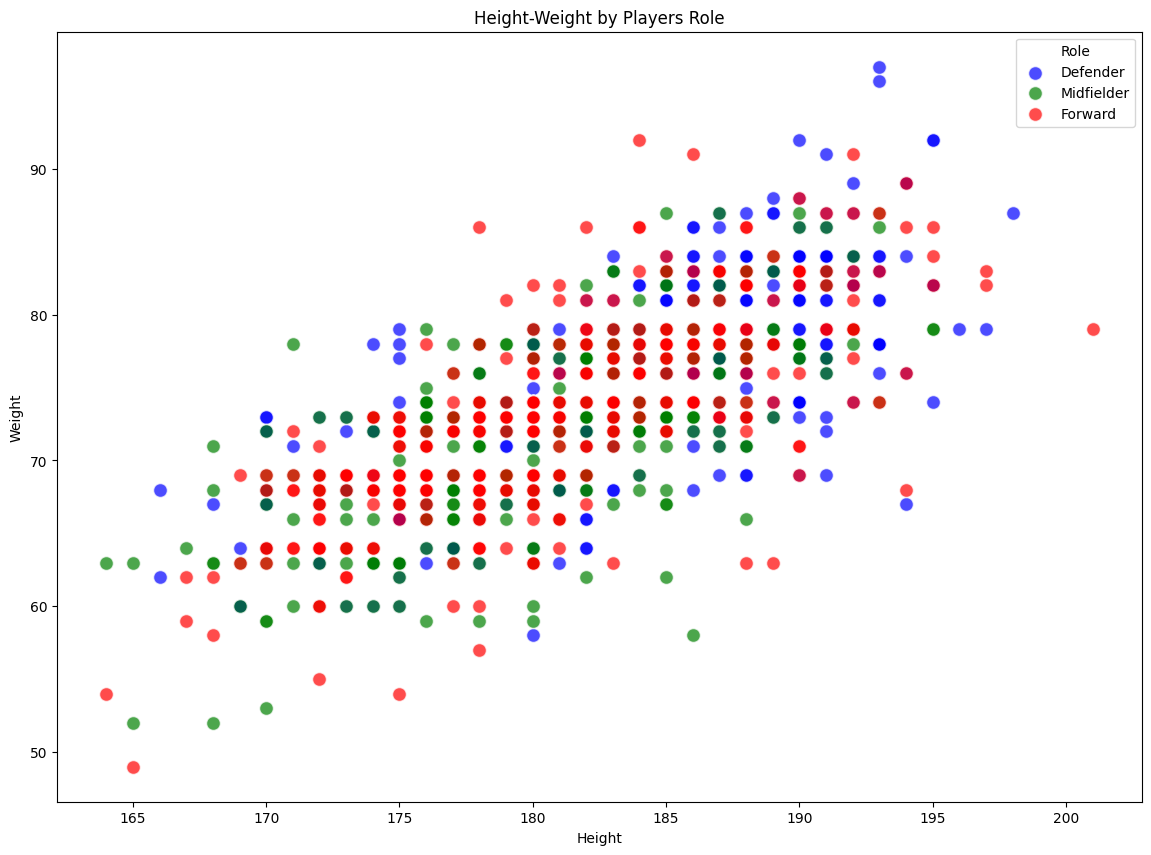

In [22]:
colors = {'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}
plt.figure(figsize=(14, 10))
for category, color in colors.items():
    plt.scatter(pl_df['Height'][pl_df['Role'] == category], pl_df['Weight'][pl_df['Role'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight by Players Role')
plt.legend(title='Role')
plt.show()

In [23]:
fw_df = pl_df[pl_df['Role']=='Forward']
mid_df = pl_df[pl_df['Role']=='Midfielder']
def_df = pl_df[pl_df['Role']=='Defender']

#### Forwards physical data

In [24]:
fw_df.groupby('Position')[['Height', 'Weight']].mean()

,Height,Weight
Position,,
Centre-Forward,184.317073,76.524390
Left Winger,178.362637,69.813187
Right Winger,177.100000,69.488889
Second Striker,179.875000,73.000000


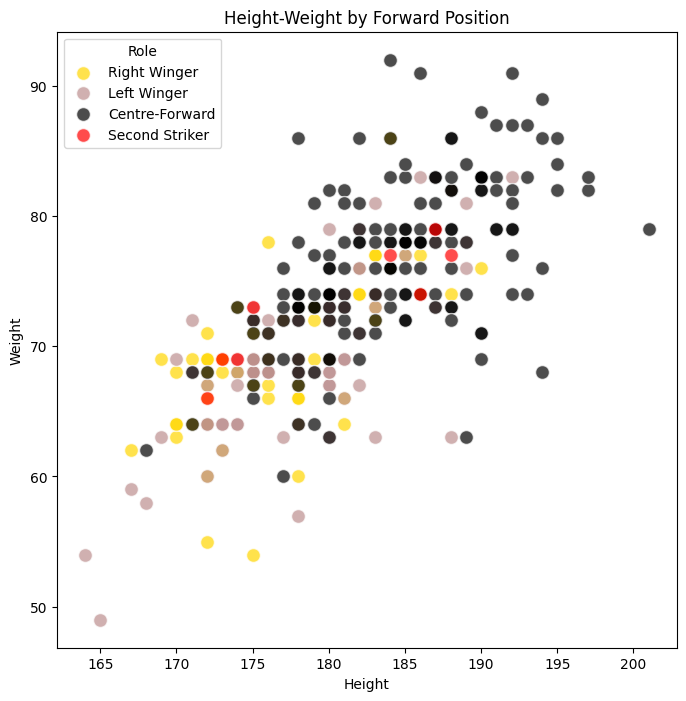

In [25]:
colors = {'Right Winger': 'gold', 'Left Winger': 'rosybrown', 'Centre-Forward': 'black', 'Second Striker': 'red'}
plt.figure(figsize=(8, 8))
for category, color in colors.items():
    plt.scatter(fw_df['Height'][fw_df['Position'] == category], fw_df['Weight'][fw_df['Position'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight by Forward Position')
plt.legend(title='Role')
plt.show()

#### Midfielders physical data

In [26]:
mid_df.groupby('Position')[['Height', 'Weight']].mean()

,Height,Weight
Position,,
Attacking Midfield,178.232558,70.453488
Central Midfield,180.094737,72.194737
Defensive Midfield,182.980769,74.076923
Left Midfield,179.214286,71.000000
Right Midfield,181.111111,71.333333


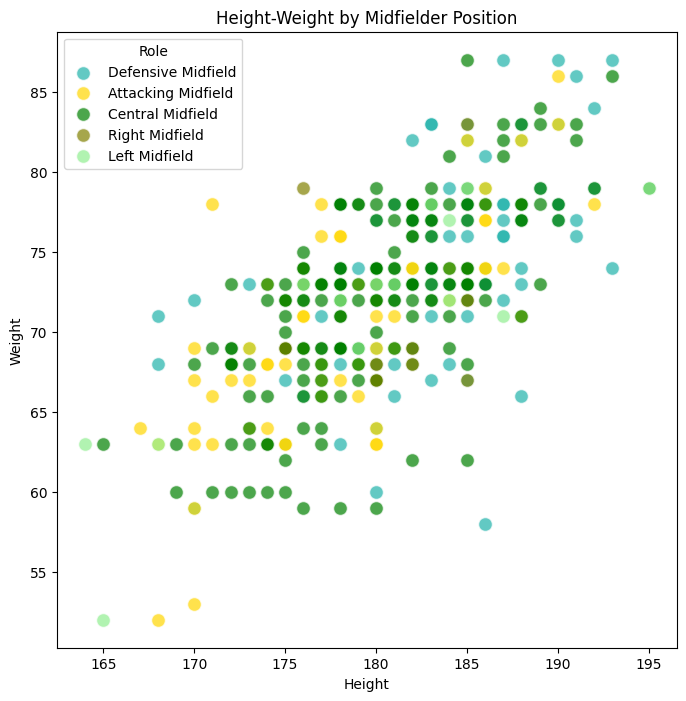

In [27]:
colors = {'Defensive Midfield': 'lightseagreen', 'Attacking Midfield': 'gold', 'Central Midfield': 'green', 'Right Midfield': 'olive', 'Left Midfield': 'lightgreen'}
plt.figure(figsize=(8, 8))
for category, color in colors.items():
    plt.scatter(mid_df['Height'][mid_df['Position'] == category], mid_df['Weight'][mid_df['Position'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight by Midfielder Position')
plt.legend(title='Role')
plt.show()

#### Defenders Dimensions

In [28]:
def_df.groupby('Position')[['Height', 'Weight']].mean()

,Height,Weight
Position,,
Centre-Back,187.274900,78.573705
Left-Back,178.346154,71.259615
Right-Back,179.260504,71.907563


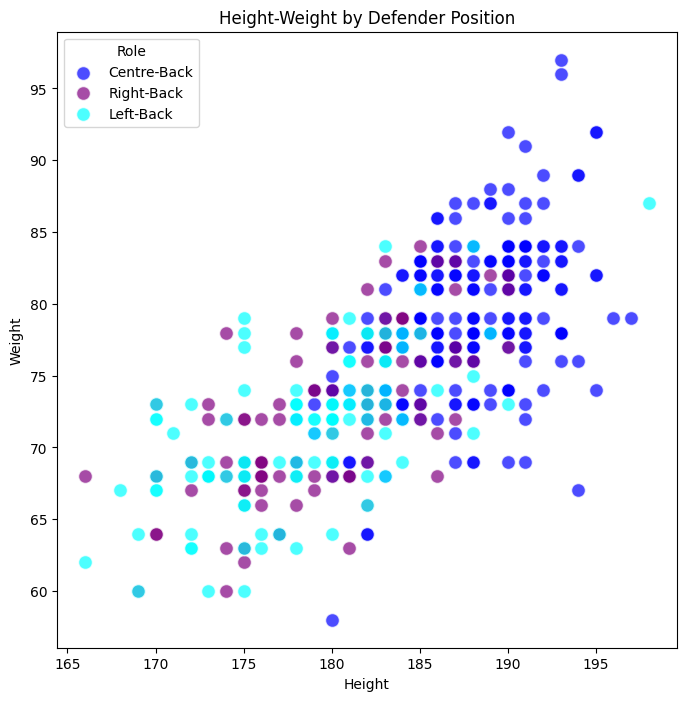

In [29]:
def_df['Position'].unique()
colors = {'Centre-Back': 'blue', 'Right-Back': 'purple', 'Left-Back': 'aqua'}
plt.figure(figsize=(8, 8))
for category, color in colors.items():
    plt.scatter(def_df['Height'][def_df['Position'] == category], def_df['Weight'][def_df['Position'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight by Defender Position')
plt.legend(title='Role')
plt.show()

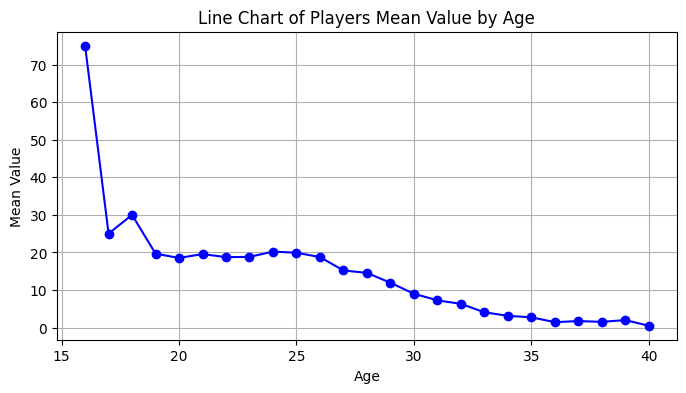

In [30]:
grouped_age = pl_df.groupby('Age')
mean_values = grouped_age['Value'].mean()
plot = mean_values.plot(figsize=(8, 4), marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Line Chart of Players Mean Value by Age')
plt.grid(True)
plt.show()


In [31]:
correlation = pl_df['Age'].corr(pl_df['Value'])

print("Correlation between Age and Value:", correlation)

Correlation between Age and Value: -0.26200190624281283


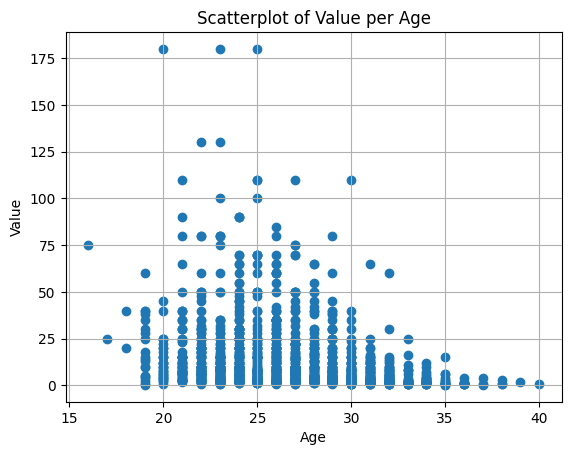

In [32]:
plt.scatter(pl_df['Age'], pl_df['Value'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Scatterplot of Value per Age')
plt.grid(True)
plt.show()

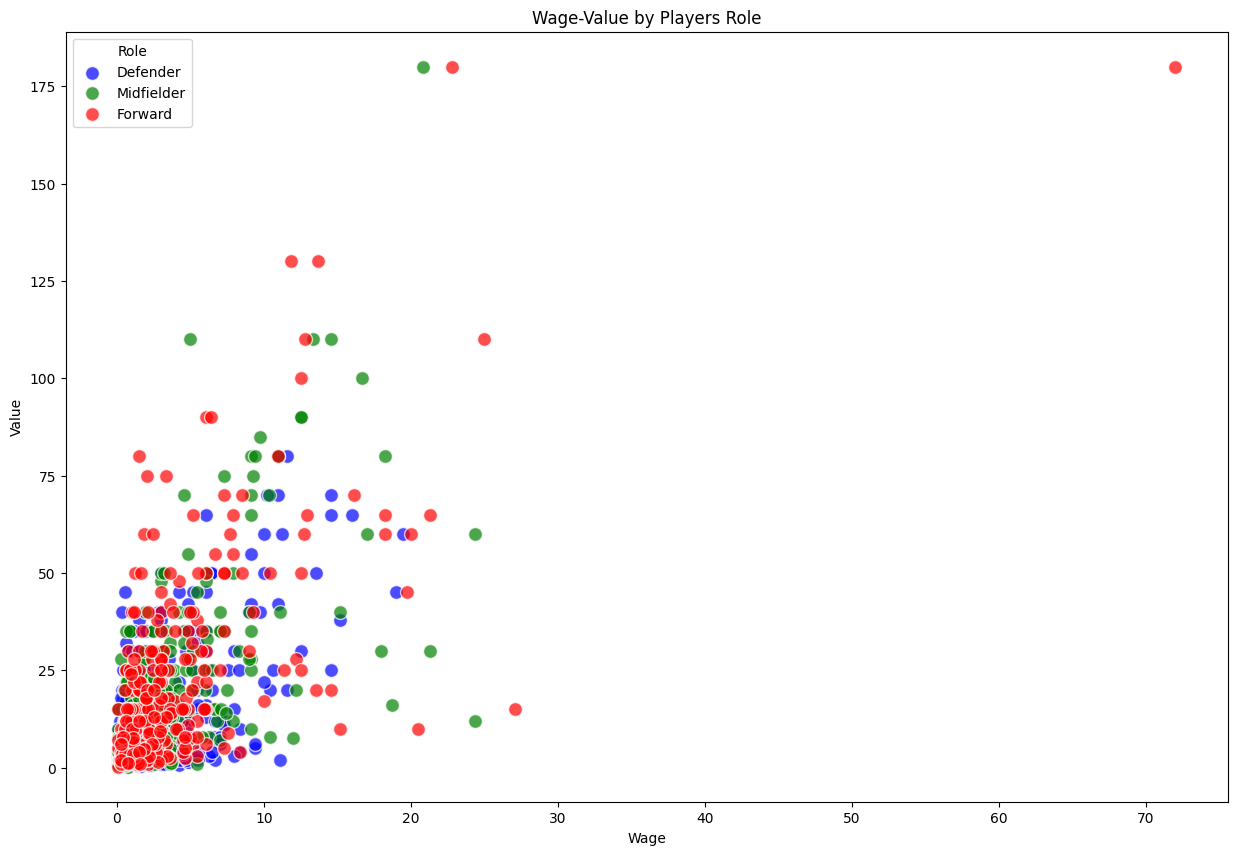

In [33]:
colors = {'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}
plt.figure(figsize=(15, 10))
for category, color in colors.items():
    plt.scatter(pl_df['Wage'][pl_df['Role'] == category], pl_df['Value'][pl_df['Role'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Wage-Value by Players Role')
plt.legend(title='Role')
plt.show()

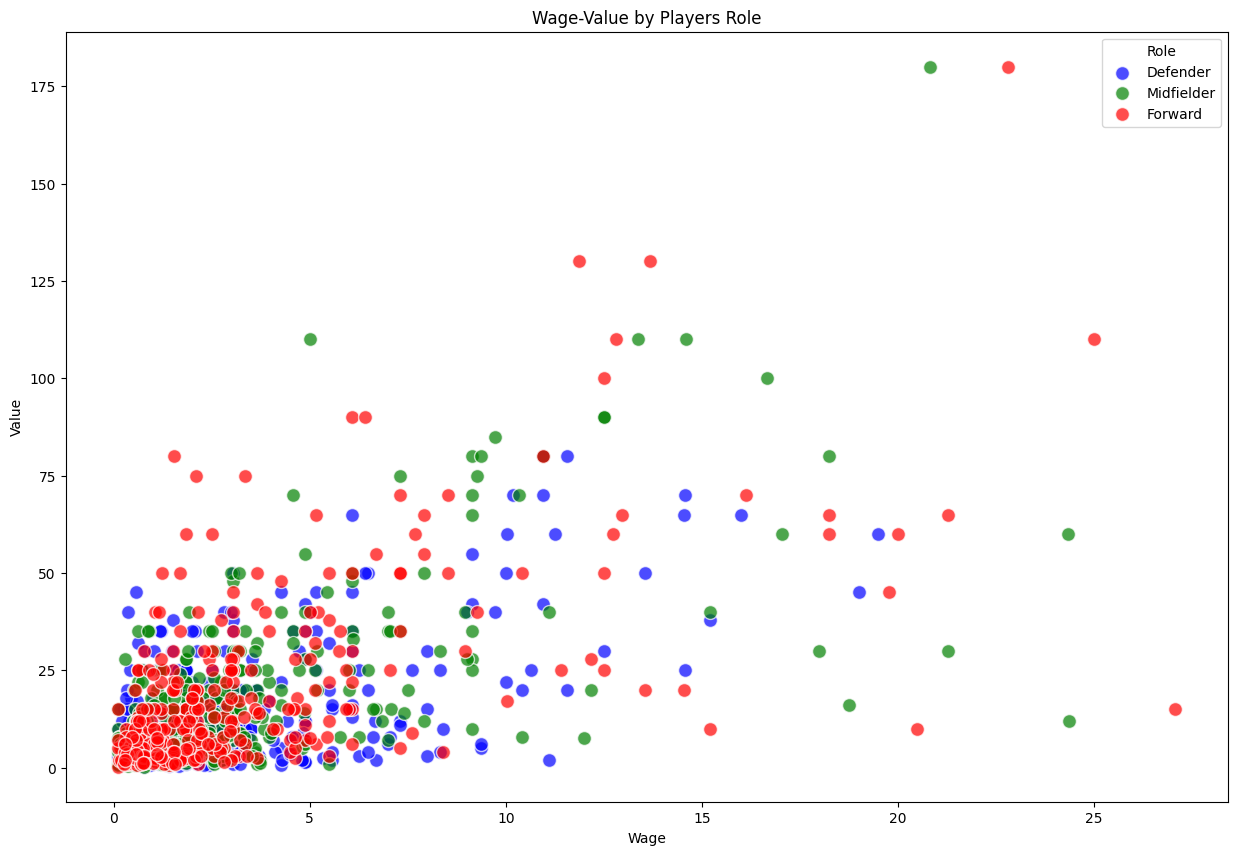

In [34]:
colors = {'Defender': 'blue', 'Midfielder': 'green', 'Forward': 'red'}
temp_df = pl_df[pl_df['Wage'] < 70 ]
plt.figure(figsize=(15, 10))
for category, color in colors.items():
    plt.scatter(temp_df['Wage'][temp_df['Role'] == category], temp_df['Value'][temp_df['Role'] == category], c=color, label=category, alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Wage-Value by Players Role')
plt.legend(title='Role')
plt.show()

In [35]:
correlation = pl_df['Wage'].corr(pl_df['Value'])

print("Correlation between Wage and Value:", correlation)

Correlation between Wage and Value: 0.6639562826931686


In [36]:
pl_df.columns

Index(['Player', 'Foot', 'Height', 'Weight', 'Nationality', 'Club', 'Wage',
       'Expiration', 'Non-PenaltyGoals', 'npxG:Non-PenaltyxG', 'ShotsTotal',
       'Assists', 'xAG:Exp.AssistedGoals', 'npxG+xAG', 'Shot-CreatingActions',
       'PassesAttempted', 'PassCompletion%', 'ProgressivePasses',
       'ProgressiveCarries', 'SuccessfulTake-Ons', 'Touches(AttPen)',
       'ProgressivePassesRec', 'Tackles', 'Interceptions', 'Blocks',
       'Clearances', 'AerialsWon', 'Position', 'Birth', 'Value', 'League',
       'Age', 'Role'],
      dtype='object')

In [37]:
miss_years = pl_df[['Player', 'Expiration', 'Value']].copy()
miss_years['Missing'] = miss_years['Expiration'].astype(float)-2024
miss_years
correlation = miss_years['Missing'].corr(miss_years['Value'])

print("Correlation between Contract missing years and Value:", correlation)

Correlation between Contract missing years and Value: 0.38938758498062775


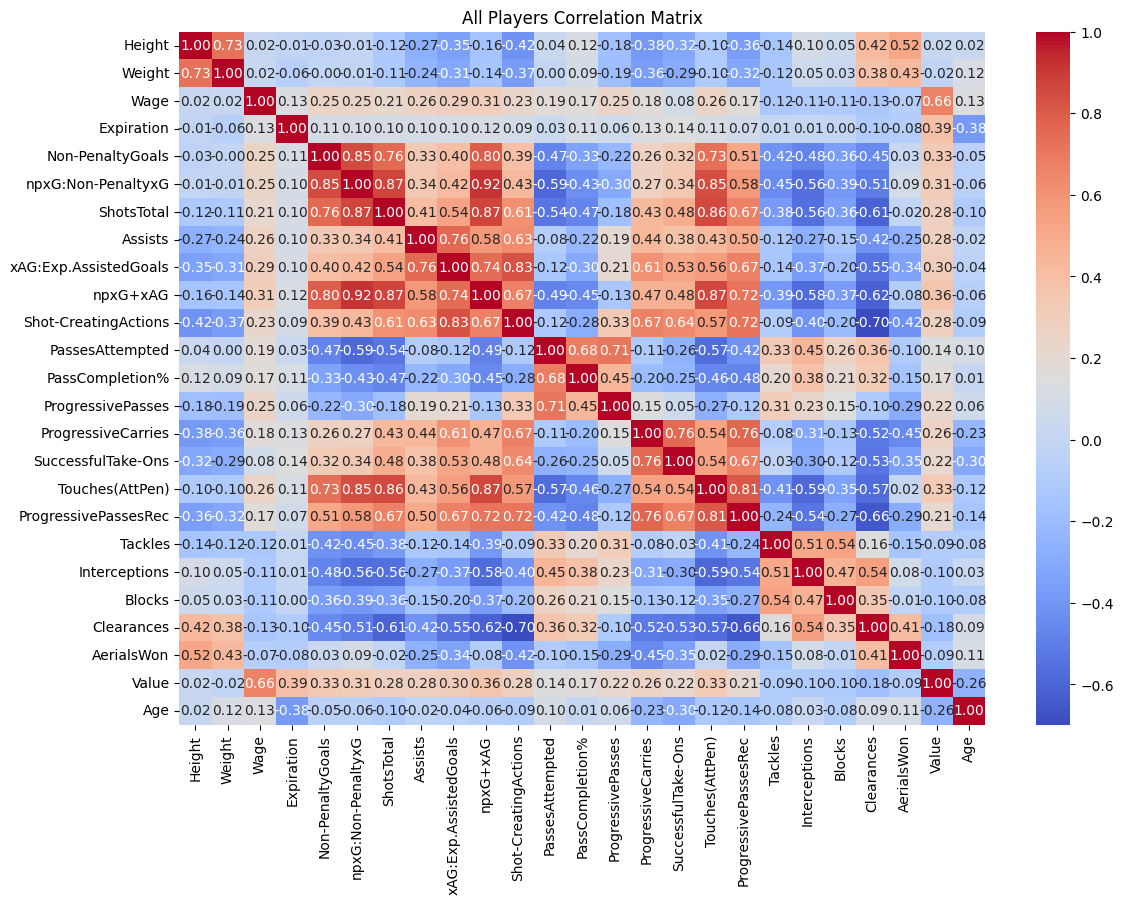

In [38]:
numeric_columns = pl_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns
correlation_matrix = pl_df[numeric_columns].corr()
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('All Players Correlation Matrix')
plt.show()

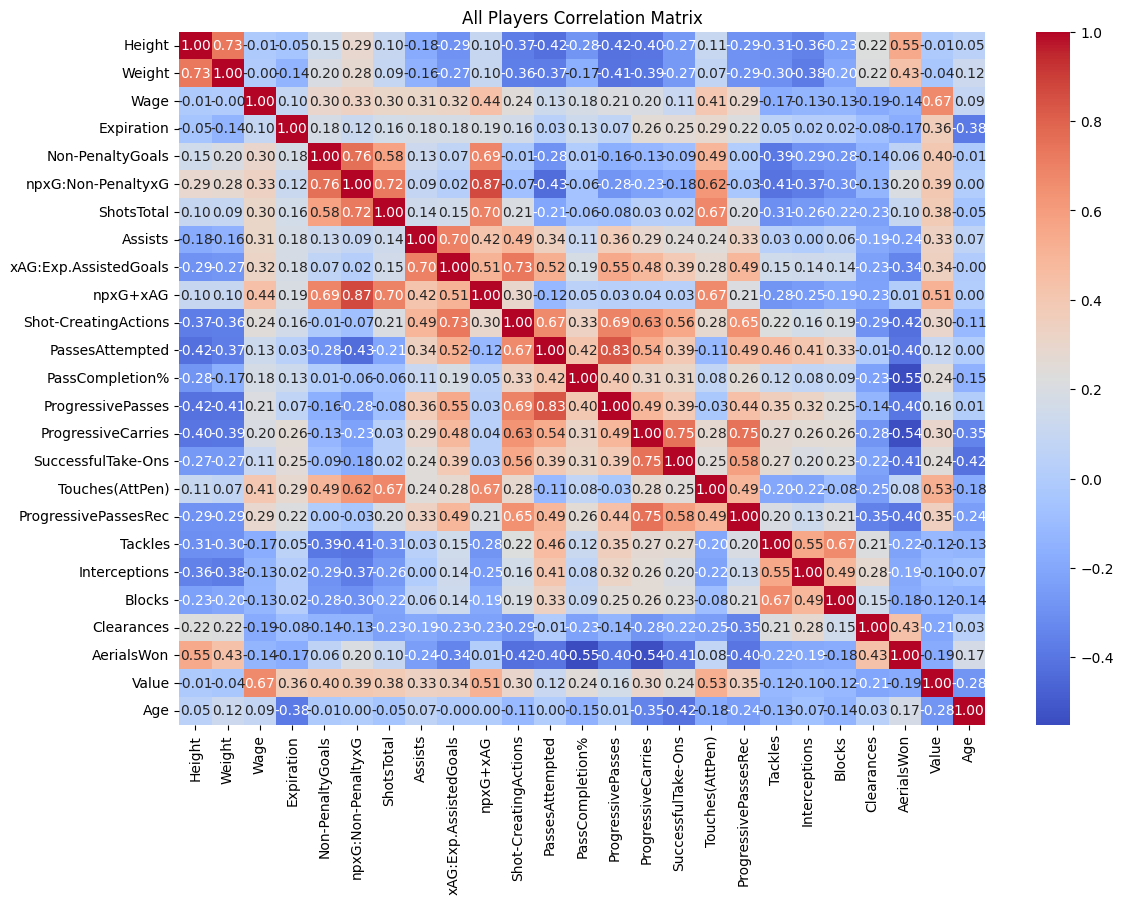

In [39]:
numeric_columns = fw_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns
correlation_matrix = fw_df[numeric_columns].corr()
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Forwards Players Correlation Matrix')
plt.show()

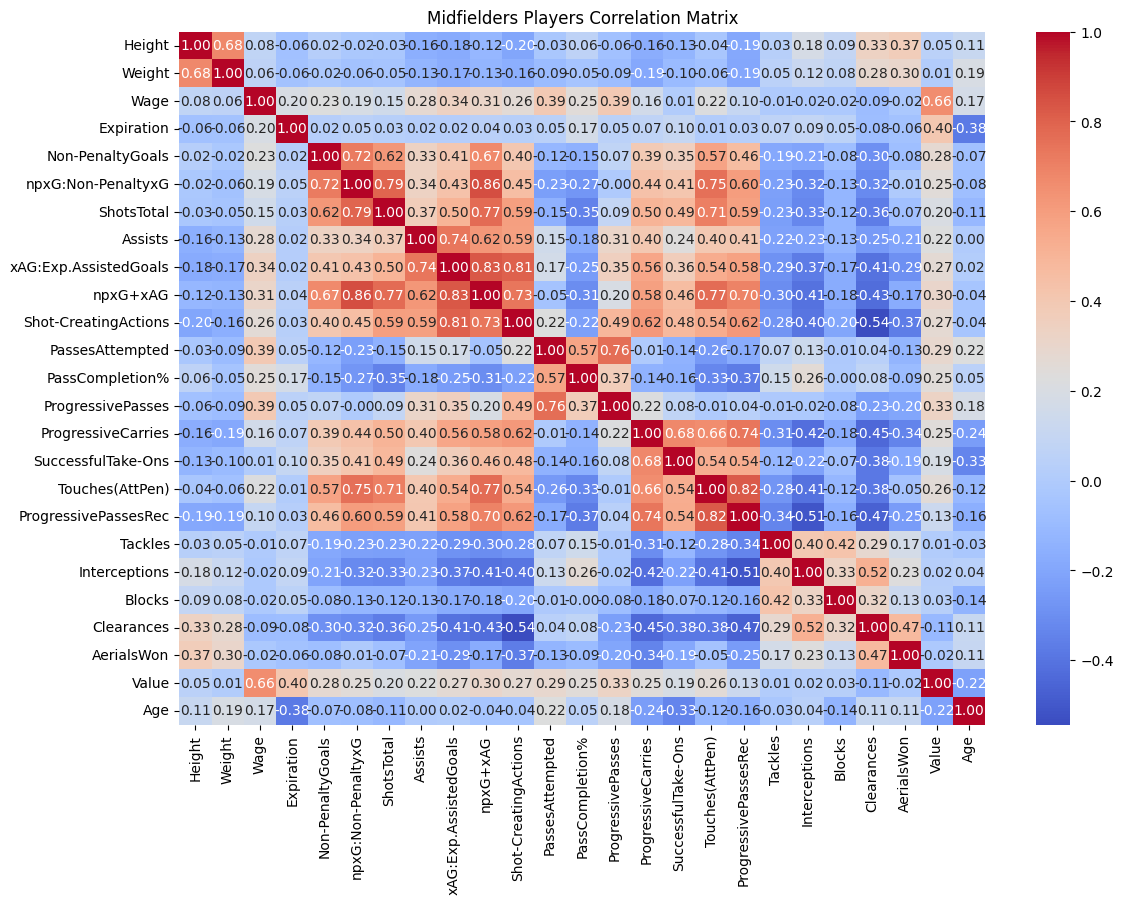

In [41]:
numeric_columns = mid_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns
correlation_matrix = mid_df[numeric_columns].corr()
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Midfielders Players Correlation Matrix')
plt.show()

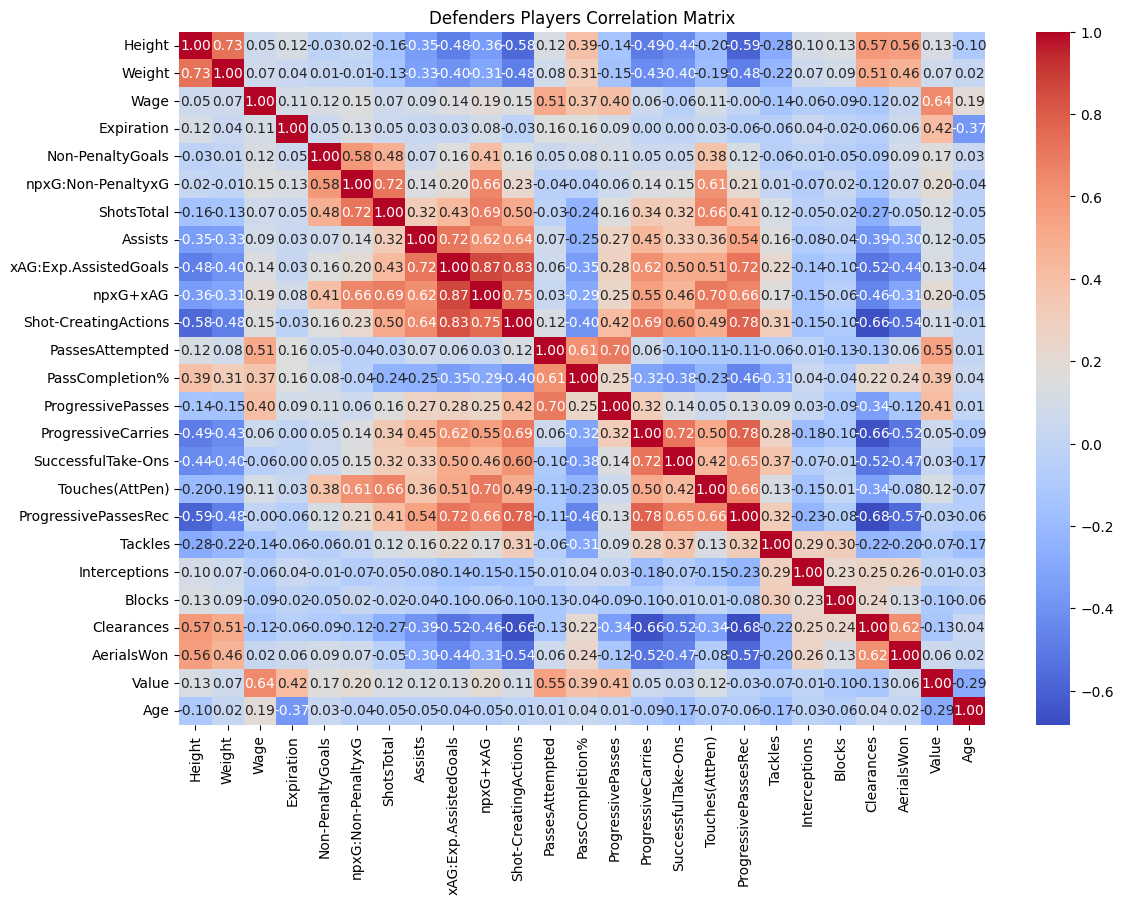

In [43]:
numeric_columns = def_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns
correlation_matrix = def_df[numeric_columns].corr()
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Defenders Players Correlation Matrix')
plt.show()